# Q4: Quantum Phase Estimation (QPE)

Quantum Phase Estimation (QPE) is another essential building block for quantum algorithms, such as Shor's factoring algorithm. It uses QFT as a subroutine.
The problem in its simplest form is: given an eigenstate of a unitary operator, find its eigenvalue. We will walk through the main quantum part of Shor's factoring algorithm, which uses QPE for *order finding*. You may find this Pennylane tutorial to be helpful for learning more about QPE: https://pennylane.ai/qml/demos/tutorial_qpe.

We can reduce finding nontrivial factors of some positive integer $N$ to finding the *order* of some integer $1 < a < N$ such that the greatest common divisor (gcd) of $a$ and $N$ is 1. That is, $a$ and $N$ are *co-prime*.

The order of $a$ mod $N$ is defined to be the *least* positive integer, $r$, such that $x^r = 1(\text{ mod }N)$. For example, the order of 4 mod 15 is 2 because $4^1 \text{ mod } 15 = 4 \text{ mod } 15 \neq 1 \text{ mod } 15$. But $4^2 \text{ mod } 15 = 16 \text{ mod } 15 = 1 \text{ mod } 15$.

If we find the order $r$ of $a$ mod $N$ and $r$ is even AND $g := $ gcd($a^{r/2} - 1$, $N$) is nontrivial (not 1 or $N$) THEN $g$ is a nontrivial factor of $N$. Hopefully you are convinced that all we need to do to factor is somehow find this order $r$. It's not so easy though. Order-finding is believed to be hard on a classical computer.


### Q4 (a)
What is the relationship between the unitary operator $U|y\rangle := |ay(\text{mod } N)\rangle$ and this expression that contains $r$, the order of $a$ mod $N$: $e^{2\pi i \frac{s}{r}}$? $s$ is just some integer. (Hint: $U$ is the unitary operator that we want to apply QPE to with one of its eigenstates as input)

TODO: type your short answer here

The eigenvalues of $ U $ are $ e^{2\pi i \frac{s}{r}} $, where $ r $ is the order of $ a \mod N $. Quantum Phase Estimation (QPE) extracts the phase $ \frac{s}{r} $, enabling the determination of $ r $, which is essential for solving problems like factoring $ N $.

### Q4 (b)

You may have noticed that what we actually get from QPE is an estimate of $s/r$, not $r$ directly. This is not a problem though because we have an efficient algorithm based on *continued fractions* to extract $r$.

Here is a picture of a QPE circuit where $|\psi\rangle$ is an eigenstate of $U$ and we measure out $\theta$, the *phase* of the eigenvalue of $|\psi\rangle$. So for order finding $\theta = s/r$.

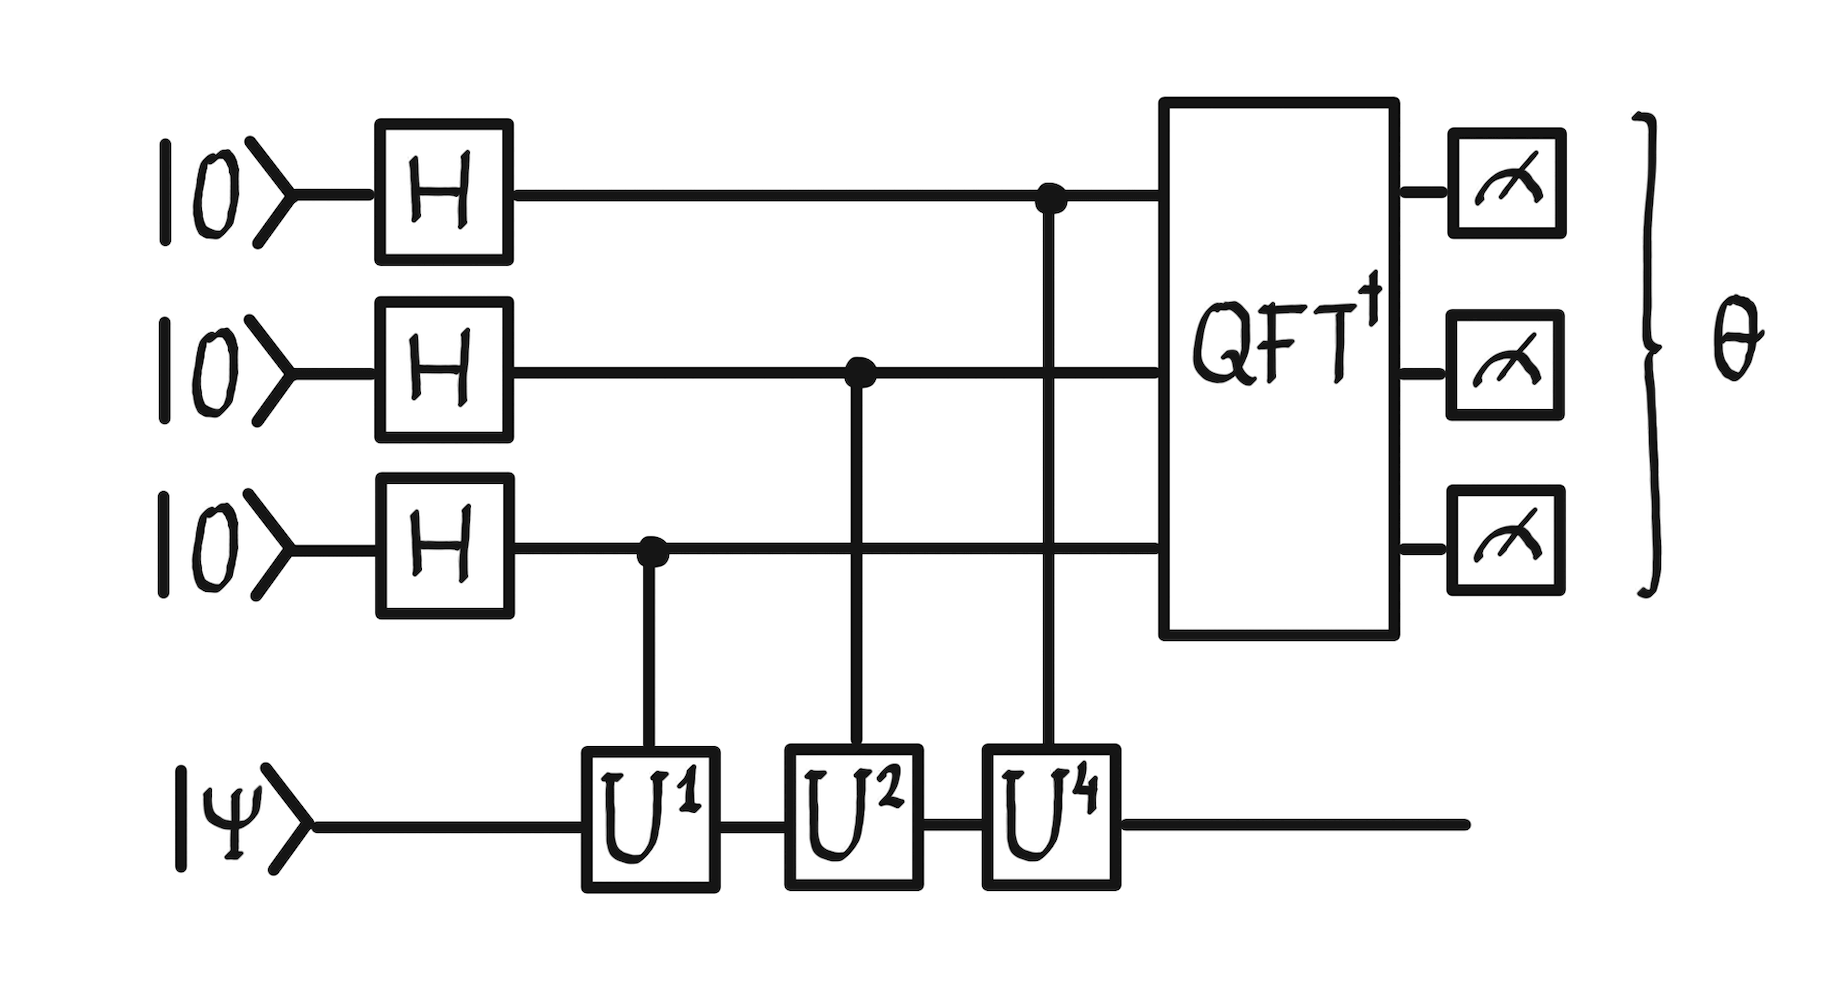

For order finding, what should the eigenstate $|\psi\rangle$ be?

TODO: type your short answer here
 
$$
|u_s\rangle = \frac{1}{\sqrt{r}} \sum_{k=0}^{r-1} e^{-2\pi i \frac{s k}{r}} |a^k \pmod{N}\rangle,
$$  
where $ r $ is the order of $ a \mod N $, and $ s \in \{0, 1, \dots, r-1\} $.  
 
$$
U |u_s\rangle = \frac{1}{\sqrt{r}} \sum_{k=0}^{r-1} e^{-2\pi i \frac{s k}{r}} |a^{k+1} \mod N\rangle.
$$  

$$
U |u_s\rangle = \frac{1}{\sqrt{r}} e^{2\pi i \frac{s}{r}} \sum_{k'=0}^{r-1} e^{-2\pi i \frac{s k'}{r}} |a^{k'} \mod N\rangle = e^{2\pi i \frac{s}{r}} |u_s\rangle.
$$  




### Q4 (c)

The controlled $U$ gates are the hardest part to implement in order finding because they are performing modular exponentiation. For now, we'll consider a simpler case so we can understand the internals of QPE a little better.


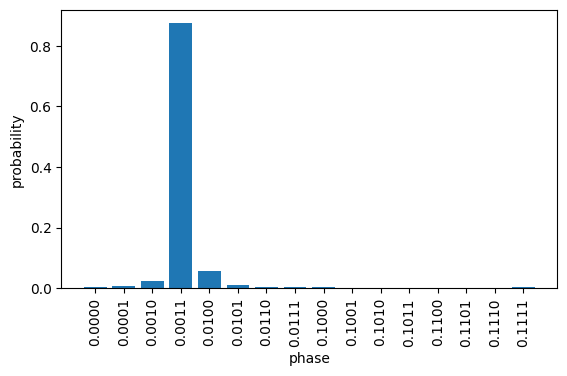

In [ ]:
# Here is code from the tutorial linked in the beginning of Q4
import pennylane as qml
import numpy as np

def U(wires):
    return qml.PhaseShift(2 * np.pi / 5, wires=wires)

dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # initialize to state |1>
    qml.PauliX(wires=0)

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(U(wires=0), control=estimation_wires)

    qml.adjoint(qml.QFT)(wires=estimation_wires)

    return qml.probs(wires=estimation_wires)

import matplotlib.pyplot as plt

estimation_wires = range(1, 5)

results = circuit_qpe(estimation_wires)

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

Try removing the inverse QFT step and plot the resulting histogram.

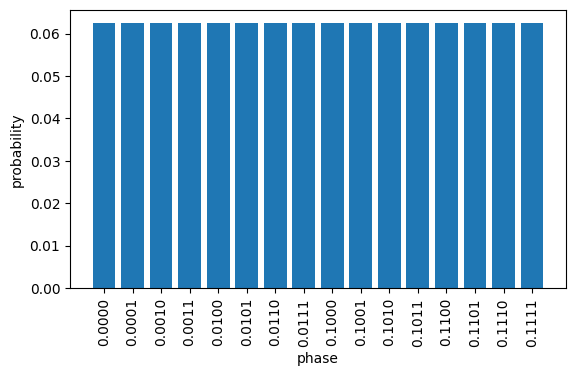

In [ ]:
# Insert code here to plot histogram after removing inverse QFT
dev = qml.device("default.qubit")

@qml.qnode(dev)
def circuit_qpe(estimation_wires):
    # initialize to state |1>
    qml.PauliX(wires=0)

    for wire in estimation_wires:
        qml.Hadamard(wires=wire)

    qml.ControlledSequence(U(wires=0), control=estimation_wires)

    return qml.probs(wires=estimation_wires)

import matplotlib.pyplot as plt

estimation_wires = range(1, 5)

results = circuit_qpe(estimation_wires)

bit_strings = [f"0.{x:0{len(estimation_wires)}b}" for x in range(len(results))]

plt.bar(bit_strings, results)
plt.xlabel("phase")
plt.ylabel("probability")
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.3)

plt.show()

What do you observe about the output now? Can you still infer the phase?

TODO: type your short answer here

No, the probability distribution becomes all the same.

To dig a little deeper, the state we have before the inverse QFT is $$\frac{1}{2^{n/2}}\sum_{x=0}^{2^n-1}e^{2\pi i \theta x}|x\rangle$$ Does $\theta$, the phase we want to extract, contribute at all to any of the outcome probabilities? Why or why not?

TODO: type your short answer here

$$
P(x) = \left| \frac{1}{2^{n/2}} e^{2\pi i \theta x} \right|^2 = \frac{1}{2^n}.
$$  
So $\psi$ does not matter on $P$ at all.

### Q4 (d)

What happens if the input $|\psi\rangle$ is not an eigenstate of $U$? Does QPE still work or will we simply measure garbage?

TODO: type your short answer here

The output will be the mix of eigenstate and not reliable.